# 统计推断基础
- 数据说明：本数据是地区房价增长率数据
- 名称-中文含义
- dis_name-小区名称
- rate-房价同比增长率

In [1]:
import os

os.chdir('Q:/data')
os.getcwd()

'Q:\\data'

In [2]:
import pandas as pd

house_price_gr = pd.read_csv('Q:/data/house_price_gr.csv', encoding='gbk')
house_price_gr

,dis_name,rate
0,东城区甘南小区,0.169747
1,东城区察慈小区,0.165484
2,东城区胡家园小区,0.141358
3,东城区台基厂小区,0.063197
4,东城区青年湖小区,0.101528
5,东城区小黄庄小区,0.068467
6,东城区和平里六区,0.118572
7,东城区京香福苑小区,0.161386
8,东城区安贞苑50号院,0.085863
9,东城区安馨园小区,0.104397


## 参数估计
进行描述性统计分析

In [3]:
house_price_gr.describe(include='all')

,dis_name,rate
count,150,150.000000
unique,150,NaN
top,朝阳区惠中园小区,NaN
freq,1,NaN
mean,NaN,0.110061
std,NaN,0.041333
min,NaN,0.029540
25%,NaN,0.080027
50%,NaN,0.104908
75%,NaN,0.140066


Histograph

In [4]:
%matplotlib inline
import seaborn as sns
from scipy import stats

# sns.distplot(house_price_gr.rate, kde=True, fit=stats.norm) # Histograph

Q-Q

E:\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


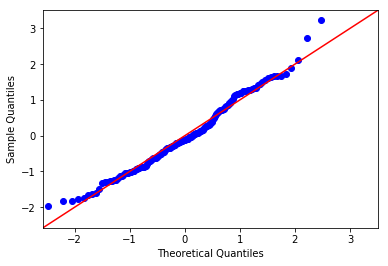

In [5]:
import statsmodels.api as sm
from matplotlib import pyplot as plt

fig = sm.qqplot(house_price_gr.rate, fit=True, line='45')
fig.show()

Box Plots

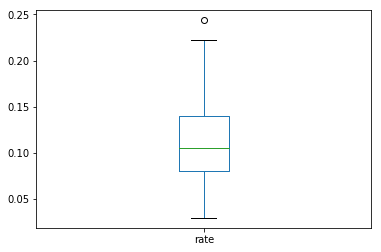

In [6]:
house_price_gr.plot(kind='box') # Box Plots

置信度区间估计

In [7]:
se = house_price_gr.rate.std() / len(house_price_gr) ** 0.5
LB = house_price_gr.rate.mean() - 3 * se
UB = house_price_gr.rate.mean() + 3 * se
(LB, UB)

(0.09993649947438818, 0.12018549392945813)

In [8]:
# 如果要求任意置信度下的置信区间的话，可以自己编一个函数
def confint(x, alpha=0.05):
    n = len(x)
    xb = x.mean()
    df = n-1
    tmp = (x.std() / n ** 0.5) * stats.t.ppf(1-alpha/2, df)
    return {'Mean': xb, 'Degree of Freedom':df, 'LB':xb-tmp, 'UB':xb+tmp}

confint(house_price_gr.rate, 0.05)

{'Degree of Freedom': 149,
 'LB': 0.10339228338892809,
 'Mean': 0.11006099670192315,
 'UB': 0.11672971001491822}

In [9]:
# 或者使用DescrStatsW
d1 = sm.stats.DescrStatsW(house_price_gr.rate)
d1.tconfint_mean(0.05) # 

(0.10339228338892814, 0.11672971001491828)

## 假设检验与单样本T检验
当年住宅价格的增长率是否超过了10%的阈值

In [10]:
print('t-statistic=%6.4f, p-value=%6.4f, df=%s' %d1.ttest_mean(0.1))
#一般认为FICO高于690的客户信誉较高，请检验该产品的客户整体信用是否高于690

t-statistic=2.9812, p-value=0.0034, df=149.0


## 两样本T检验
- 数据说明：本数据是一份汽车贷款违约数据
- 名称	中文含义
- id	id
- Acc	是否开卡(1=已开通)
- avg_exp	月均信用卡支出（元）
- avg_exp_ln	月均信用卡支出的自然对数
- gender	性别(男=1)
- Age	年龄
- Income	年收入（万元）
- Ownrent	是否自有住房（有=1；无=0)
- Selfempl	是否自谋职业(1=yes, 0=no)
- dist_home_val	所住小区房屋均价(万元)
- dist_avg_income	当地人均收入
- high_avg	高出当地平均收入
- edu_class	教育等级：小学及以下开通=0，中学=1，本科=2，研究生=3

导入数据和数据清洗

In [11]:
creditcard_exp = pd.read_csv('creditcard_exp.csv', skipinitialspace=True)
creditcard_exp = creditcard_exp.dropna(how='any')
creditcard_exp.head()


,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2
5,67,1,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,1681,-0.302113,3


根据性别比较支出

In [12]:
creditcard_exp['avg_exp'].groupby(creditcard_exp['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
0,50.0,925.7052,430.833365,163.18,593.3125,813.650,1204.7775,1992.39
1,20.0,1128.5310,462.281389,648.15,829.8600,1020.005,1238.2025,2430.03


- 第一步:方差齐次检验

In [13]:
gender0 = creditcard_exp[creditcard_exp['gender'] == 0]['avg_exp']
gender1 = creditcard_exp[creditcard_exp['gender'] == 1]['avg_exp']
leveneTestRes = stats.levene(gender0, gender1, center='median')
print('w-value=%6.4f, p-value=%6.4f' %leveneTestRes)

w-value=0.0683, p-value=0.7946


- 第二步:T-test

In [14]:
stats.stats.ttest_ind(gender0, gender1, equal_var=True)
# Or Try: sm.stats.ttest_ind(gender0, gender1, usevar='pooled')

Ttest_indResult(statistic=-1.7429013868086289, pvalue=0.085871228784484485)

## 方差分析
- 单因素方差分析

In [15]:
import pandas as pd
pd.set_option('display.max_columns', None) # 设置显示所有列
creditcard_exp.groupby('edu_class')[['avg_exp']].describe()

avg_exp                                                        \
            count         mean         std     min        25%       50%   
edu_class                                                                 
0             2.0   207.370000   62.494097  163.18   185.2750   207.370   
1            23.0   641.937826  147.577741  418.78   525.5950   593.920   
2            23.0   973.321304  229.163196  610.25   807.8200   959.830   
3            22.0  1422.280909  435.281442  816.03  1166.9975  1343.025   

                               
                 75%      max  
edu_class                      
0           229.4650   251.56  
1           736.1400   987.66  
2          1075.2700  1472.82  
3          1661.4125  2430.03

In [16]:
edu = []
for i in range(4):
    edu.append(creditcard_exp[creditcard_exp['edu_class'] == i]['avg_exp'])
stats.f_oneway(*edu)

F_onewayResult(statistic=31.825683356937645, pvalue=7.658361691248968e-13)

- 多因素方差分析

In [17]:
from statsmodels.formula.api import ols

sm.stats.anova_lm(ols('avg_exp ~ C(edu_class) + C(gender)',data=creditcard_exp).fit())

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,31.578365,1.031496e-12
C(gender),1.0,4.178273e+04,4.178273e+04,0.487111,4.877082e-01
Residual,65.0,5.575481e+06,8.577662e+04,NaN,NaN


In [18]:
ana = ols('avg_exp ~ C(edu_class) + C(gender) +C(edu_class)*C(gender)', data= creditcard_exp).fit()
sm.stats.anova_lm(ana)

,df,sum_sq,mean_sq,F,PR(>F)
C(edu_class),3.0,8.126056e+06,2.708685e+06,33.839350,3.753889e-13
C(gender),1.0,4.178273e+04,4.178273e+04,0.521988,4.726685e-01
C(edu_class):C(gender),3.0,5.476737e+05,1.825579e+05,2.280678,8.786000e-02
Residual,63.0,5.042862e+06,8.004544e+04,NaN,NaN


## 相关分析
散点图

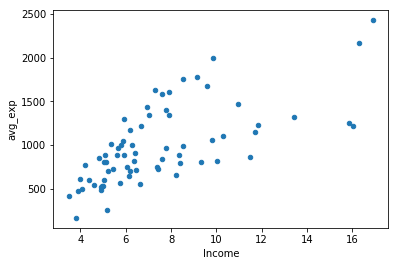

In [19]:
creditcard_exp.plot(x='Income', y='avg_exp', kind='scatter')


相关性分析:“spearman”,“pearson” 和 "kendall"

In [20]:
creditcard_exp[['Income', 'avg_exp']].corr(method='pearson')

,Income,avg_exp
Income,1.000000,0.674011
avg_exp,0.674011,1.000000


## 卡方检验

In [21]:
accepts = pd.read_csv('accepts.csv')
accepts = accepts.sample(30)
cross_table = pd.crosstab(accepts.bankruptcy_ind, columns=accepts.bad_ind)
# Or try this: accepts.pivot_table(index='bankruptcy_ind',columns='bad_ind', values='application_id', aggfunc='count')
cross_table

bad_ind,0,1
bankruptcy_ind,,
N,20,6
Y,2,0


In [22]:
print('chisq = %6.4f\n p-value = %6.4f\n dof = %i\n expected_freq = %s'  %stats.chi2_contingency(cross_table))

chisq = 0.0163
 p-value = 0.8984
 dof = 1
 expected_freq = [[ 20.42857143   5.57142857]
 [  1.57142857   0.42857143]]
